In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 遍历目录查询存在的图片

In [2]:
ori_path = './红外弱小目标提取样例/'
imgs = os.listdir(ori_path) 
print('共{}张图片'.format(len(imgs)))

共10张图片


# 形态梯度的方式

(240, 320)


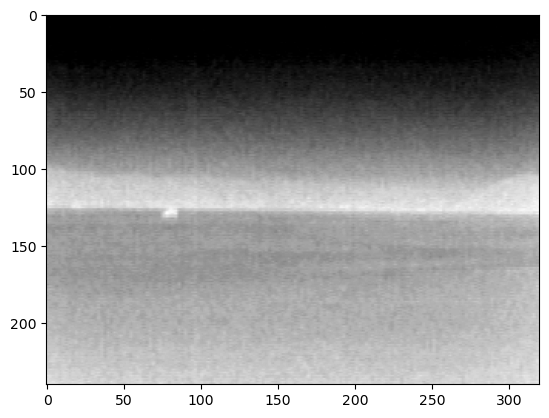

In [3]:
#读取图片显示一下
image2 = cv2.imread(ori_path+imgs[0], 0)
print(image2.shape)
plt.imshow(image2,cmap='gray')
plt.show()

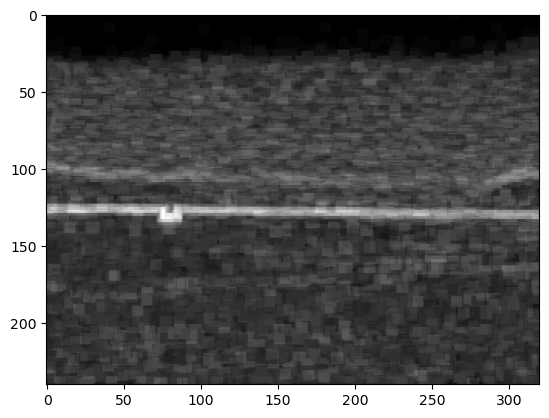

In [4]:
#梯度运算
kernel = np.ones((7, 7), np.uint8)
gradient = cv2.morphologyEx(image2,cv2.MORPH_GRADIENT,kernel)
plt.imshow(gradient,cmap='gray')
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(240, 320)


(<Axes: >, <matplotlib.image.AxesImage at 0x13425b850>)

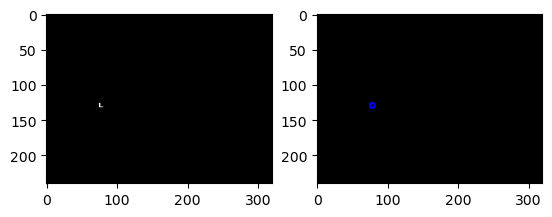

In [9]:
#二值化处理
_, binary_image2 = cv2.threshold(gradient, 40, 255, cv2.THRESH_BINARY)
rgb_image = cv2.cvtColor(binary_image2, cv2.COLOR_GRAY2RGB)
# cv2.rectangle(rgb_image, (20, 20), (140, 140), (255, 0, 0), 3)
print(binary_image2)
print(binary_image2.shape)
plt.subplot(121),plt.imshow(binary_image2,cmap='gray')
#寻找轮廓
contours, hierarchy = cv2.findContours(binary_image2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 绘制矩形框
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(rgb_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
plt.subplot(122),plt.imshow(rgb_image)